In [1]:
# Import standard libraries
import os

# Third-Party Libraries
import numpy as np
import matplotlib.pyplot as plt

# Import the Swarm Systems Lab Simulator
from ssl_simulator import SimulationEngine, load_sim, add_src_to_path
from ssl_simulator.robot_models import Unicycle2D
from ssl_simulator.visualization import set_paper_parameters
set_paper_parameters(fontsize=15)

from ssl_simulator.components.gvf import GvfEllipse, GvfLine

# -------------------------------------------------------------------------------------
# Import custom functions and classes (src in path is requiered)
add_src_to_path("", deep=0)

from sim_core.visualization import PlotBasicGvfIK
from sim_core.controllers import GvfIK

# -------------------------------------------------------------------------------------
# Define constants for file paths
OUTPUT_DIR = os.path.join("..", "output")
SIMDATA_FILE = os.path.join(OUTPUT_DIR, "data.csv")

# GVF-IK for path following with induced oscillations

## Ellipse $N = 1$

In [2]:
# Define the initial state
N = 1

p = np.ones((N,2)) * np.array([[-200,-10]])
speed = np.ones((N)) * np.array([14])
theta = np.ones((N)) * np.array([-90])

x0 = [p, speed, theta]

# Controller settings
A = np.ones((N)) * 0.3
omega = np.ones((N)) * np.pi/4

# --------------------------------
# Generate the trajectory to be followed
a, b = 60, 60
XYoff, alpha = [0, 0], 0

gvf_traj = GvfEllipse(XYoff,alpha,a,b)

# Select the robot model
robot_model = Unicycle2D(x0, omega_lims=[-np.pi/4, np.pi/4])

# Initialize the controller
s, ke, kn = 1, 0.35, 1
controller = GvfIK(gvf_traj, s, ke, kn, A, omega)


# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt, 
                             log_filename=SIMDATA_FILE, log_time_step=0.1)

# --------------------------------
# Run the simulation and save data
tf = 38

simulator.run(tf)
# --------------------------------

Running simulation:   0%|          | 0/3800 [00:00<?, ?it/s]

Running simulation: 100%|██████████| 3800/3800 [00:00<00:00, 5967.22it/s]


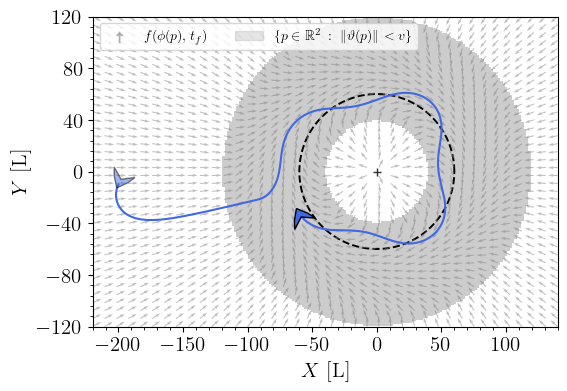

In [4]:
# Load previously saved simulation data from the specified file
simulation_data, settings = load_sim(SIMDATA_FILE, debug=False)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasicGvfIK(simulation_data, settings, dpi=100,
                       xlims=[-220,140], ylims=[-120,120])

# Generate and display the plot
ax = plotter.plot(draw_field=True, fw=True, pts=40, alpha=0.5, color="grey")

plt.show()

## Ellipse $N = 3$

In [5]:
# Define the initial state
N = 3

p = np.ones((N,2)) * np.array([[150,-200]])
speed = np.ones((N)) * np.array([14])
theta = np.ones((N)) * np.array([-90])

x0 = [p, speed, theta]

# Controller settings
A = np.array([0,0.3,0.45])
omega = np.ones((N)) * np.pi/5

# --------------------------------
# Generate the trajectory to be followed
a, b = 100, 60
XYoff, alpha = [0, 0], 0

gvf_traj = GvfEllipse(XYoff,alpha,a,b)

# Select the robot model
robot_model = Unicycle2D(x0)

# Initialize the controller
s, ke, kn = 1, 0.5, 1
controller = GvfIK(gvf_traj, s, ke, kn, A, omega)


# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt, 
                             log_filename=SIMDATA_FILE, log_time_step=0.1)

# --------------------------------
# Run the simulation and save data
tf = 40

simulator.run(tf)
# --------------------------------

Running simulation: 100%|██████████| 4000/4000 [00:01<00:00, 3595.03it/s]


------------------ SETTINGS ------------------
gvf_traj:
  __class__: GvfEllipse
  __params__:
    XYoff: shape (2,)
    alpha: 0
    a: 100
    b: 60
----------------------------------------------
------------------- DATA ---------------------
time: shape (401,)
p: shape (401, 3, 2)
speed: shape (401, 3)
theta: shape (401, 3)
p_dot: shape (401, 3, 2)
speed_dot: shape (401, 3)
theta_dot: shape (401, 3)
u: shape (401, 3)
s: shape (401,)
ke: shape (401,)
kn: shape (401,)
gamma_A: shape (401, 3)
gamma_omega: shape (401, 3)
gamma: shape (401, 3)
gamma_dot: shape (401, 3)
phi: shape (401,)
e: shape (401,)
omega_d: shape (401, 3)
time: shape (401,)
p: shape (401, 3, 2)
speed: shape (401, 3)
theta: shape (401, 3)
p_dot: shape (401, 3, 2)
speed_dot: shape (401, 3)
theta_dot: shape (401, 3)
u: shape (401, 3)
s: shape (401,)
ke: shape (401,)
kn: shape (401,)
gamma_A: shape (401, 3)
gamma_omega: shape (401, 3)
gamma: shape (401, 3)
gamma_dot: shape (401, 3)
phi: shape (401,)
e: shape (401,)
omega

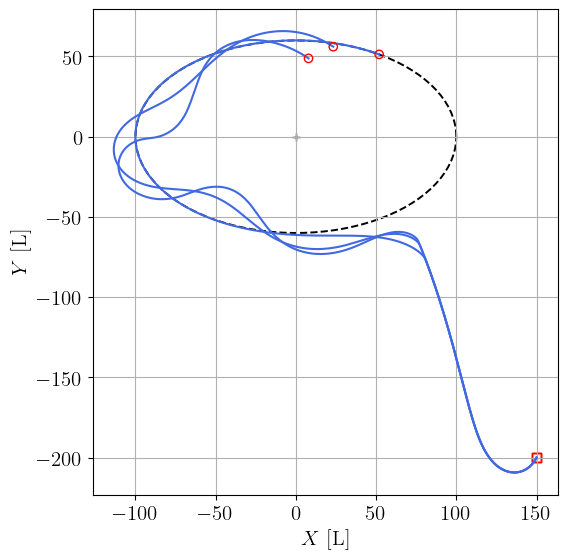

In [6]:
# Load previously saved simulation data from the specified file
simulation_data, settings = load_sim(SIMDATA_FILE, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasicGvfIK(simulation_data, settings)

# Generate and display the plot
ax = plotter.plot(alpha=0.4)

plt.show()

## Line $N = 3$

In [7]:
# Define the initial state
N = 3

p = np.ones((N,2)) * np.array([[10,10]])
speed = np.ones((N)) * np.array([14])
theta = np.ones((N)) * np.array([-90])

x0 = [p, speed, theta]

# Controller settings
A = np.array([0,8,16])
omega = np.ones((N)) * np.pi/4

# --------------------------------
# Generate the trajectory to be followed
m, a = 0, 0
gvf_traj = GvfLine(m, a, line_length=350)

# Select the robot model
robot_model = Unicycle2D(x0)

# Initialize the controller
s, ke, kn = 1, 0.4, 1
controller = GvfIK(gvf_traj, s, ke, kn, A, omega)


# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt, 
                             log_filename=SIMDATA_FILE, log_time_step=0.1)

# --------------------------------
# Run the simulation and save data
tf = 20

simulator.run(tf)
# --------------------------------

Running simulation: 100%|██████████| 2000/2000 [00:00<00:00, 13712.21it/s]


------------------ SETTINGS ------------------
gvf_traj:
  __class__: GvfLine
  __params__:
    m: 0
    b: 0
    line_length: 350
----------------------------------------------
------------------- DATA ---------------------
time: shape (201,)
p: shape (201, 3, 2)
speed: shape (201, 3)
theta: shape (201, 3)
p_dot: shape (201, 3, 2)
speed_dot: shape (201, 3)
theta_dot: shape (201, 3)
u: shape (201, 3)
s: shape (201,)
ke: shape (201,)
kn: shape (201,)
gamma_A: shape (201, 3)
gamma_omega: shape (201, 3)
gamma: shape (201, 3)
gamma_dot: shape (201, 3)
phi: shape (201,)
e: shape (201,)
omega_d: shape (201, 3)
time: shape (201,)
p: shape (201, 3, 2)
speed: shape (201, 3)
theta: shape (201, 3)
p_dot: shape (201, 3, 2)
speed_dot: shape (201, 3)
theta_dot: shape (201, 3)
u: shape (201, 3)
s: shape (201,)
ke: shape (201,)
kn: shape (201,)
gamma_A: shape (201, 3)
gamma_omega: shape (201, 3)
gamma: shape (201, 3)
gamma_dot: shape (201, 3)
phi: shape (201,)
e: shape (201,)
omega_d: shape (201, 3)
-

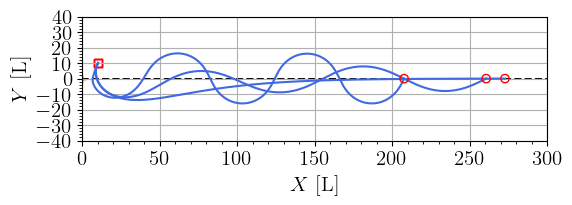

In [8]:
# Load previously saved simulation data from the specified file
simulation_data, settings = load_sim(SIMDATA_FILE, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasicGvfIK(simulation_data, settings, 
                       xlims=[0, 300], ylims=[-40,40], 
                       max_major_ticks=5)

# Generate and display the plot
ax = plotter.plot(alpha=0.8)
plt.show()